In [72]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import cv2
import imageio 
import shutil
from pathlib import Path

%load_ext autoreload
%autoreload 2

# BGR
TUM_BLUE = (189, 101, 0)
TUM_ORANGE = (34, 114, 227)
TUM_GREEN = (0, 172, 162)
TUM_LIGHTER_BLUE = (234, 198, 152)

SHAPE = (480, 360)
FORMAT = 360/480

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
rgb_dir, depth_dir, gt_dir, gt_depth_dir = [f"renderonly_test_399999/{_}" for _ in ["estim", "estim_depth", "gt", "gt_depth"]]

dnerf_human = "logs/report_johannes_01_dnerf/"
mse_dgs_human = "logs/report_johannes_05_mse_dgs/"
human_img = "001.png"

paths = [
    [   
        os.path.join(dnerf_human, rgb_dir, human_img),
        os.path.join(mse_dgs_human, rgb_dir, human_img),
        os.path.join(dnerf_human, gt_dir, human_img),
        os.path.join(dnerf_human, depth_dir, human_img),
        os.path.join(mse_dgs_human, depth_dir, human_img),
        os.path.join(dnerf_human, gt_depth_dir, human_img),
        ],
    [
        os.path.join()
    ]
]


logs/report_johannes_01_dnerf/renderonly_test_399999/estim/001.png
logs/report_johannes_05_mse_dgs/renderonly_test_399999/estim/001.png
logs/report_johannes_01_dnerf/renderonly_test_399999/gt/001.png
logs/report_johannes_01_dnerf/renderonly_test_399999/estim_depth/001.png
logs/report_johannes_05_mse_dgs/renderonly_test_399999/estim_depth/001.png
logs/report_johannes_01_dnerf/renderonly_test_399999/gt_depth/001.png


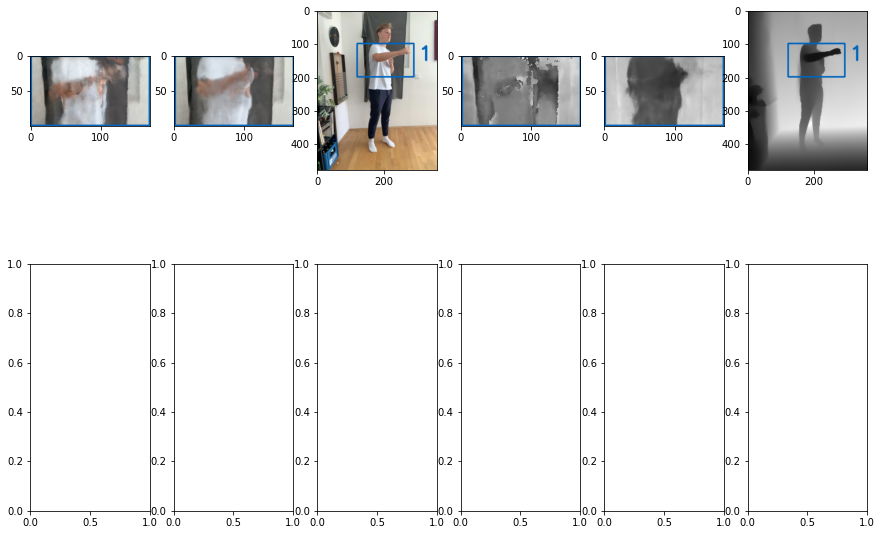

In [68]:
fig, ax = plt.subplots(2, 6, figsize=(15, 10))
copy_dir = Path(f"REPORT_COMPARISON_FIGURES")
copy_dir.mkdir(parents=True, exist_ok=True)

for row in range(1):
    for col in range(6):
        img_path = paths[row][col]
        print(img_path)
        img_arr = imageio.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_RGB2BGR)
        
        if row == 0:
            upper_left = (120, 100)
            lower_right = (290, 200)
            text_loc = (int(lower_right[0] + 15), (upper_left[1]+lower_right[1])//2)
            text = "1"
        
        if col not in [2, 5]:       # if not GT
            img_arr = img_arr[upper_left[1]:lower_right[1], upper_left[0]:lower_right[0], ]
        else:
            cv2.rectangle(img_arr, upper_left, lower_right, color=TUM_BLUE, thickness=3)    
            cv2.putText(img_arr, text, text_loc, cv2.FONT_HERSHEY_SIMPLEX, 2, TUM_BLUE, 5)

        # shutil.copyfile(img_path, f"{copy_dir}/")
        cv2.imwrite(os.path.join(copy_dir, f"r{row}_c{col}.png"), img_arr)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

        ax[row, col].imshow(img_arr)


In [50]:
text_loc

(205.0, 220)

In [70]:
img_arr.shape

(480, 360, 3)